# NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Library documentation: <a>https://networkx.github.io/</a>

In [1]:
import networkx as nx
G = nx.Graph()

In [ ]:
# basic add nodes
G.add_node(1)
G.add_nodes_from([2, 3])

In [ ]:
# add a group of nodes at once
H = nx.path_graph(10)
G.add_nodes_from(H)

In [ ]:
# add another graph itself as a node
G.add_node(H)

In [ ]:
# add edges using similar methods
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges())

In [ ]:
# can also remove or clear
G.remove_node(H)
G.clear()

In [ ]:
# repeats are ignored
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node('spam')       # adds node "spam"
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'

In [ ]:
# get the number of nodes and edges
G.number_of_nodes(), G.number_of_edges()

(8, 2)

In [ ]:
# access graph edges
G[1]

{2: {}, 3: {}}

In [ ]:
G[1][2]

{}

In [ ]:
# set an attribute of an edge
G.add_edge(1,3)
G[1][3]['color'] = 'blue'

In [ ]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adjacency_iter():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [ ]:
# graph attribte
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [ ]:
# modifying an attribute
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [ ]:
# node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.node[1]['room'] = 714
G.nodes(data=True)

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

In [ ]:
# edge attributes (weight is a special numeric attribute)
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2 ,{'color': 'blue'}), (2, 3, {'weight' :8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4

In [ ]:
# directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [ ]:
DG.degree(1, weight='weight')

1.25

In [ ]:
DG.successors(1)

[2]

In [ ]:
DG.predecessors(1)

[3]

In [ ]:
# convert to undirected graph
H = nx.Graph(G)

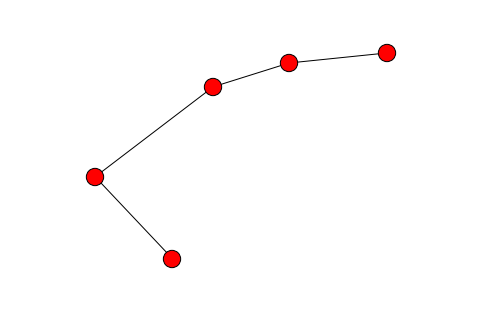

In [ ]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

In [ ]:
# create directed multigraph
G = nx.MultiDiGraph()

# add parallel edges
G.add_edge('A', 'B', relation='friend')  # directed edge A -> B
G.add_edge('A', 'B', relation='neighbour')

In [5]:
# create a bipartite graph with 2 sets of nodes
B = nx.Graph()
B.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite=0)  # 1st set of nodes 
B.add_nodes_from([1, 2, 3, 4], bipartite=1)  # 2nd set of nodes

# add edges
B.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

# check if graph is bipartite
from networkx.algorithms import bipartite
bipartite.is_bipartite(B)

# check if a set of nodes is a bipartition of a graph
X = set([1, 2, 3, 4])
bipartite.is_bipartite_node_set(B, X)

True

In [6]:
B = nx.Graph()
# 9 fans, 4 teams
B.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('D', 1), ('H', 1),
                 ('B', 2), ('C', 2), ('D', 2), ('E', 2), ('G', 2), 
                 ('E', 3), ('F', 3), ('H', 3), ('J', 3), ('E', 4),
                 ('I', 4), ('J', 4)])

X = set(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

# create projected graph - network of edges between any two nodes 
# that are adjacent to at least one common neighbour 
P = bipartite.projected_graph(B, X)

# create weighted projected graph - weights = number of common neighbours between nodes
P = bipartite.weighted_projected_graph(B, X)